# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### Week 02 · Notebook 4 — Dashboard Architecture & Design Patterns
**Instructor:** Amir Charkhi  |  **Goal:** Build production-ready dashboards that drive decisions.

> Format: design patterns → layout principles → interactive components → state management → optimization.


---
## From Visualization to Impact
Dashboards transform data into decisions. Let's architect dashboards that inform, engage, and influence.

## Setup and Imports

In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 10.1 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/9.8 MB 10.6 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.8 MB 11.0 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.8 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 10.7 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   -----------

In [4]:
pip install ipywidgets

   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 12.3 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [jupyterlab_widgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   -------------------------- ------------- 2/3 [ipywidgets]
   ---------------------------------------- 3/3 [ipywidgets]

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta
import json
import time
import warnings
warnings.filterwarnings('ignore')

# For dashboard examples
from IPython.display import HTML, display, IFrame
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, VBox, HBox

# Configure plotting
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
px.defaults.template = 'plotly_white'

print("Dashboard architecture toolkit loaded!")

Dashboard architecture toolkit loaded!


## 1. Dashboard Design Patterns

Understanding the three fundamental dashboard types and their use cases.

### 1.1 Monitoring Dashboard Pattern

**Purpose:** Real-time system health and KPI tracking  
**Update Frequency:** Real-time to minutes  
**Key Elements:** Alerts, gauges, time series, status indicators

In [2]:
# Generate monitoring data
np.random.seed(42)
timestamps = pd.date_range(start='2024-01-01', periods=1440, freq='1min')

monitoring_data = pd.DataFrame({
    'timestamp': timestamps,
    'cpu_usage': np.random.beta(2, 5, 1440) * 100,
    'memory_usage': np.random.beta(3, 2, 1440) * 100,
    'response_time': np.random.gamma(2, 50, 1440),
    'error_rate': np.random.poisson(2, 1440) / 100,
    'requests_per_sec': np.random.poisson(100, 1440)
})

# Add anomalies
anomaly_indices = np.random.choice(1440, 10, replace=False)
monitoring_data.loc[anomaly_indices, 'response_time'] *= 5

print("Monitoring data shape:", monitoring_data.shape)
monitoring_data.head()

Monitoring data shape: (1440, 6)


,timestamp,cpu_usage,memory_usage,response_time,error_rate,requests_per_sec
0,2024-01-01 00:00:00,35.367666,52.133704,96.729755,0.00,99
1,2024-01-01 00:01:00,24.855807,35.493918,63.238428,0.03,96
2,2024-01-01 00:02:00,41.595909,32.257268,69.595681,0.03,102
3,2024-01-01 00:03:00,15.996758,50.391926,157.513455,0.03,96
4,2024-01-01 00:04:00,55.028308,82.163458,185.771309,0.01,103


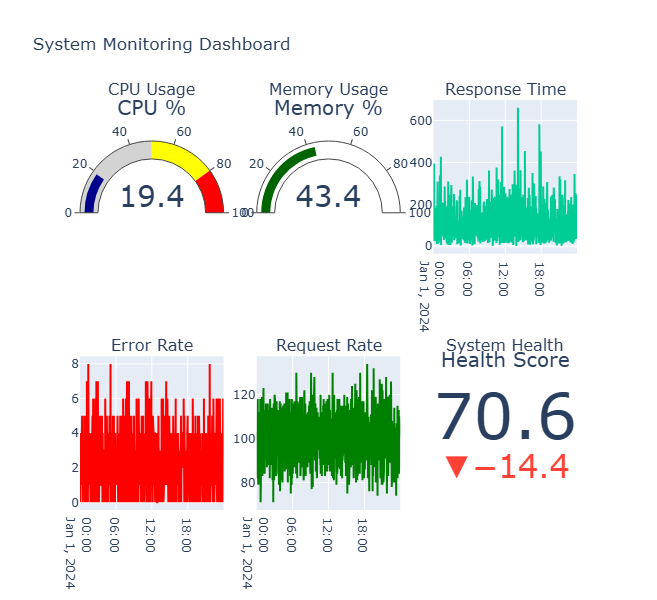

In [3]:
# Create monitoring dashboard layout
def create_monitoring_dashboard(data):
    """Create a monitoring dashboard with key metrics and alerts"""
    
    # Create subplots
    fig = make_subplots(
        rows=2, cols=3,
        subplot_titles=(
            'CPU Usage', 'Memory Usage', 'Response Time',
            'Error Rate', 'Request Rate', 'System Health'
        ),
        specs=[
            [{'type': 'indicator'}, {'type': 'indicator'}, {'type': 'scatter'}],
            [{'type': 'scatter'}, {'type': 'scatter'}, {'type': 'indicator'}]
        ]
    )
    
    latest = data.iloc[-1]
    
    # CPU Gauge
    fig.add_trace(
        go.Indicator(
            mode="gauge+number",
            value=latest['cpu_usage'],
            title={'text': 'CPU %'},
            gauge={'axis': {'range': [0, 100]},
                   'bar': {'color': 'darkblue'},
                   'steps': [
                       {'range': [0, 50], 'color': 'lightgray'},
                       {'range': [50, 80], 'color': 'yellow'},
                       {'range': [80, 100], 'color': 'red'}]}
        ),
        row=1, col=1
    )
    
    # Memory Gauge
    fig.add_trace(
        go.Indicator(
            mode="gauge+number",
            value=latest['memory_usage'],
            title={'text': 'Memory %'},
            gauge={'axis': {'range': [0, 100]},
                   'bar': {'color': 'darkgreen'}}
        ),
        row=1, col=2
    )
    
    # Response Time
    fig.add_trace(
        go.Scatter(
            x=data['timestamp'],
            y=data['response_time'],
            mode='lines',
            name='Response Time'
        ),
        row=1, col=3
    )
    
    # Error Rate
    fig.add_trace(
        go.Scatter(
            x=data['timestamp'],
            y=data['error_rate'] * 100,
            mode='lines',
            name='Error Rate',
            line=dict(color='red')
        ),
        row=2, col=1
    )
    
    # Request Rate
    fig.add_trace(
        go.Scatter(
            x=data['timestamp'],
            y=data['requests_per_sec'],
            mode='lines',
            name='Requests/sec',
            line=dict(color='green')
        ),
        row=2, col=2
    )
    
    # Health Score
    health_score = 100 - (data[['cpu_usage', 'memory_usage', 'error_rate']].mean().mean())
    fig.add_trace(
        go.Indicator(
            mode="number+delta",
            value=health_score,
            title={'text': 'Health Score'},
            delta={'reference': 85}
        ),
        row=2, col=3
    )
    
    fig.update_layout(height=600, showlegend=False, title_text="System Monitoring Dashboard")
    return fig

# Display monitoring dashboard
monitoring_dash = create_monitoring_dashboard(monitoring_data)
monitoring_dash.show()

### 1.2 Analytical Dashboard Pattern

**Purpose:** Deep analysis and trend discovery  
**Update Frequency:** Daily to weekly  
**Key Elements:** Filters, drill-downs, comparisons, segments

In [4]:
# Generate analytical data
np.random.seed(42)

dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
regions = ['North', 'South', 'East', 'West']
products = ['Product A', 'Product B', 'Product C', 'Product D']

analytical_data = []
for date in dates:
    for _ in range(np.random.randint(50, 200)):
        analytical_data.append({
            'date': date,
            'region': np.random.choice(regions),
            'product': np.random.choice(products),
            'quantity': np.random.randint(1, 20),
            'revenue': np.random.uniform(100, 2000),
            'cost': np.random.uniform(50, 1000)
        })

analytical_df = pd.DataFrame(analytical_data)
analytical_df['profit'] = analytical_df['revenue'] - analytical_df['cost']

print(f"Analytical data shape: {analytical_df.shape}")
analytical_df.head()

Analytical data shape: (45110, 7)


,date,region,product,quantity,revenue,cost,profit
0,2023-01-01,West,Product A,15,1490.788489,618.725560,872.062929
1,2023-01-01,East,Product B,19,289.952340,486.286447,-196.334107
2,2023-01-01,North,Product D,8,1445.337898,69.555270,1375.782628
3,2023-01-01,South,Product D,12,1883.250147,50.739828,1832.510320
4,2023-01-01,West,Product A,1,678.060262,548.518610,129.541652


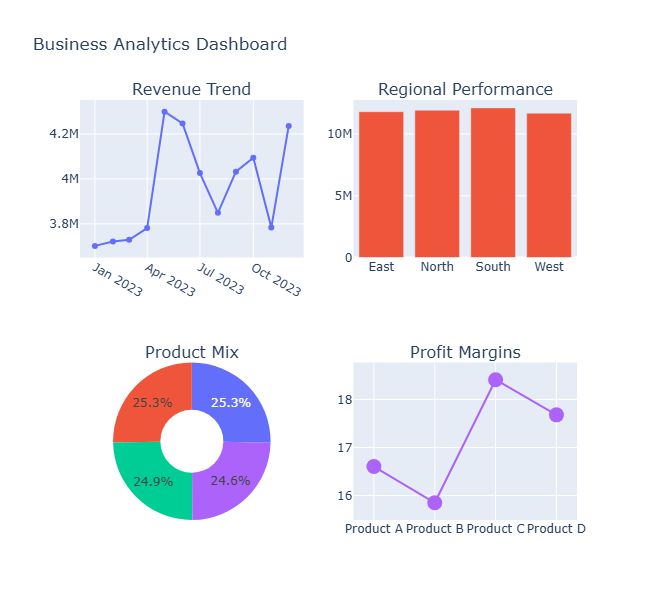

In [5]:
# Create analytical dashboard
def create_analytical_dashboard(df):
    """Create an analytical dashboard for business insights"""
    
    # Aggregate data
    monthly_revenue = df.groupby(df['date'].dt.to_period('M'))['revenue'].sum().reset_index()
    monthly_revenue['date'] = monthly_revenue['date'].dt.to_timestamp()
    
    region_performance = df.groupby('region')['revenue'].sum().reset_index()
    
    # Create subplots
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Revenue Trend', 'Regional Performance', 
                       'Product Mix', 'Profit Margins'),
        specs=[[{'type': 'scatter'}, {'type': 'bar'}],
               [{'type': 'pie'}, {'type': 'scatter'}]]
    )
    
    # Revenue Trend
    fig.add_trace(
        go.Scatter(x=monthly_revenue['date'], y=monthly_revenue['revenue'],
                  mode='lines+markers', name='Revenue'),
        row=1, col=1
    )
    
    # Regional Performance
    fig.add_trace(
        go.Bar(x=region_performance['region'], y=region_performance['revenue'],
              name='Revenue by Region'),
        row=1, col=2
    )
    
    # Product Mix
    product_revenue = df.groupby('product')['revenue'].sum()
    fig.add_trace(
        go.Pie(labels=product_revenue.index, values=product_revenue.values,
              hole=0.4),
        row=2, col=1
    )
    
    # Profit Margins
    df['margin'] = (df['profit'] / df['revenue']) * 100
    margin_by_product = df.groupby('product')['margin'].mean().reset_index()
    
    fig.add_trace(
        go.Scatter(x=margin_by_product['product'], y=margin_by_product['margin'],
                  mode='markers+lines', marker=dict(size=15)),
        row=2, col=2
    )
    
    fig.update_layout(height=600, showlegend=False, 
                     title_text="Business Analytics Dashboard")
    return fig

# Display analytical dashboard
analytical_dash = create_analytical_dashboard(analytical_df)
analytical_dash.show()

## 2. Layout Principles

Understanding visual hierarchy and user attention patterns.

### 2.1 F-Pattern Layout

Users scan in an F-shape: top horizontal, down left side, second horizontal scan.

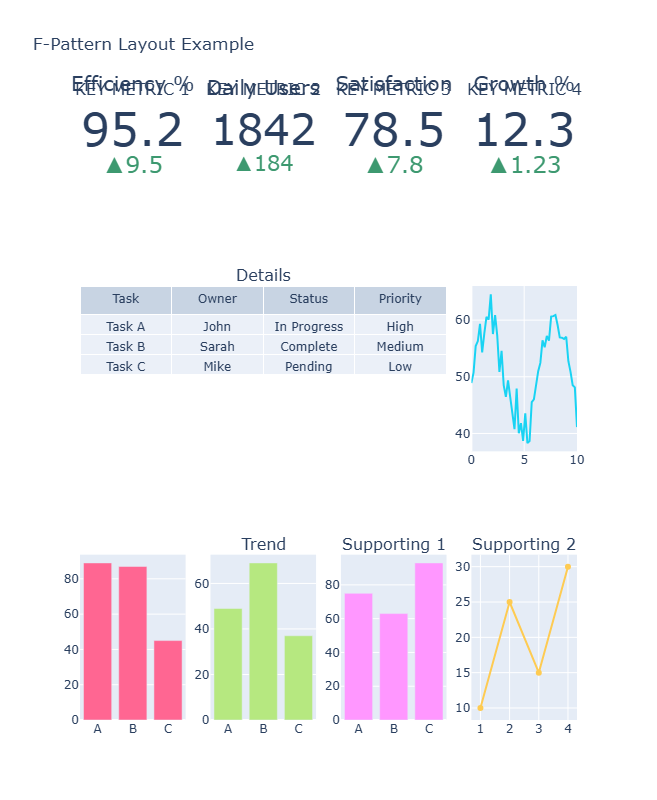

In [6]:
# Demonstrate F-Pattern Layout
def create_f_pattern_layout():
    """Create a dashboard following F-pattern layout principles"""
    
    fig = make_subplots(
        rows=3, cols=4,
        subplot_titles=[
            'KEY METRIC 1', 'KEY METRIC 2', 'KEY METRIC 3', 'KEY METRIC 4',
            'Details', '', '', 'Trend',
            'Supporting 1', 'Supporting 2', 'Supporting 3', 'Actions'
        ],
        specs=[
            [{'type': 'indicator'}, {'type': 'indicator'}, 
             {'type': 'indicator'}, {'type': 'indicator'}],
            [{'type': 'table', 'colspan': 3}, None, None, {'type': 'scatter'}],
            [{'type': 'bar'}, {'type': 'bar'}, {'type': 'bar'}, {'type': 'scatter'}]
        ],
        row_heights=[0.2, 0.4, 0.4]
    )
    
    # Top row - KPIs
    kpi_values = [95.2, 1842, 78.5, 12.3]
    kpi_titles = ['Efficiency %', 'Daily Users', 'Satisfaction', 'Growth %']
    
    for i, (val, title) in enumerate(zip(kpi_values, kpi_titles)):
        fig.add_trace(
            go.Indicator(
                mode="number+delta",
                value=val,
                title={'text': title},
                delta={'reference': val * 0.9}
            ),
            row=1, col=i+1
        )
    
    # Middle section - Table
    fig.add_trace(
        go.Table(
            header=dict(values=['Task', 'Owner', 'Status', 'Priority']),
            cells=dict(values=[
                ['Task A', 'Task B', 'Task C'],
                ['John', 'Sarah', 'Mike'],
                ['In Progress', 'Complete', 'Pending'],
                ['High', 'Medium', 'Low']
            ])
        ),
        row=2, col=1
    )
    
    # Trend line
    x = np.linspace(0, 10, 50)
    y = 50 + 10 * np.sin(x) + np.random.normal(0, 2, 50)
    fig.add_trace(
        go.Scatter(x=x, y=y, mode='lines'),
        row=2, col=4
    )
    
    # Bottom row - Supporting charts
    for i in range(3):
        fig.add_trace(
            go.Bar(x=['A', 'B', 'C'], y=np.random.randint(10, 100, 3)),
            row=3, col=i+1
        )
    
    fig.add_trace(
        go.Scatter(x=[1, 2, 3, 4], y=[10, 25, 15, 30], mode='markers+lines'),
        row=3, col=4
    )
    
    fig.update_layout(height=800, showlegend=False, 
                     title_text="F-Pattern Layout Example")
    return fig

f_pattern = create_f_pattern_layout()
f_pattern.show()

## 3. Interactive Components

Building dynamic dashboard elements with ipywidgets.

In [7]:
# Create sample data for interactive components
np.random.seed(42)
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
interactive_df = pd.DataFrame({
    'date': dates,
    'sales': 1000 + np.cumsum(np.random.randn(len(dates)) * 50),
    'profit': 500 + np.cumsum(np.random.randn(len(dates)) * 30),
    'customers': np.random.poisson(100, len(dates)),
    'region': np.random.choice(['North', 'South', 'East', 'West'], len(dates)),
    'product': np.random.choice(['A', 'B', 'C'], len(dates))
})

print("Interactive data ready:", interactive_df.shape)

Interactive data ready: (365, 6)


### 3.1 Interactive Filters

In [8]:
# Interactive filtering with ipywidgets
from IPython.display import clear_output

def create_interactive_dashboard(df):
    """Create an interactive dashboard with filters"""
    
    # Create widgets
    region_dropdown = widgets.Dropdown(
        options=['All'] + df['region'].unique().tolist(),
        value='All',
        description='Region:'
    )
    
    product_dropdown = widgets.Dropdown(
        options=['All'] + df['product'].unique().tolist(),
        value='All',
        description='Product:'
    )
    
    metric_radio = widgets.RadioButtons(
        options=['sales', 'profit', 'customers'],
        value='sales',
        description='Metric:'
    )
    
    output = widgets.Output()
    
    def update_dashboard(region, product, metric):
        with output:
            clear_output(wait=True)
            
            # Filter data
            filtered_df = df.copy()
            if region != 'All':
                filtered_df = filtered_df[filtered_df['region'] == region]
            if product != 'All':
                filtered_df = filtered_df[filtered_df['product'] == product]
            
            # Create plot
            fig = go.Figure()
            fig.add_trace(go.Scatter(
                x=filtered_df['date'],
                y=filtered_df[metric],
                mode='lines',
                name=metric.capitalize()
            ))
            
            fig.update_layout(
                title=f'{metric.capitalize()} Analysis',
                height=400
            )
            
            fig.show()
            
            print(f"Total {metric}: {filtered_df[metric].sum():,.0f}")
            print(f"Average: {filtered_df[metric].mean():,.2f}")
            print(f"Records: {len(filtered_df):,}")
    
    # Create interactive widget
    interactive_widget = widgets.interactive(
        update_dashboard,
        region=region_dropdown,
        product=product_dropdown,
        metric=metric_radio
    )
    
    display(VBox([
        widgets.HTML('<h3>Dashboard Controls</h3>'),
        HBox([region_dropdown, product_dropdown, metric_radio]),
        output
    ]))
    
    # Initial display
    update_dashboard('All', 'All', 'sales')

create_interactive_dashboard(interactive_df)

## 4. State Management & Callbacks

In [9]:
# Dashboard State Management
class DashboardState:
    """Manage dashboard state and callbacks"""
    
    def __init__(self):
        self.filters = {}
        self.cache = {}
        self.history = []
        self.callbacks = []
    
    def update_filter(self, filter_name, value):
        """Update a filter and trigger callbacks"""
        old_value = self.filters.get(filter_name)
        self.filters[filter_name] = value
        
        # Add to history
        self.history.append({
            'timestamp': datetime.now(),
            'filter': filter_name,
            'old_value': old_value,
            'new_value': value
        })
        
        # Trigger callbacks
        for callback in self.callbacks:
            callback(filter_name, old_value, value)
        
        # Clear cache
        self.cache = {}
    
    def register_callback(self, callback):
        """Register a callback function"""
        self.callbacks.append(callback)
    
    def get_state_summary(self):
        """Get current state summary"""
        return {
            'current_filters': self.filters,
            'cache_size': len(self.cache),
            'history_length': len(self.history),
            'callbacks_registered': len(self.callbacks)
        }

# Demonstrate state management
dashboard_state = DashboardState()

# Register callbacks
def log_filter_change(filter_name, old_value, new_value):
    print(f"Filter changed: {filter_name}")
    print(f"  Old: {old_value} -> New: {new_value}")

dashboard_state.register_callback(log_filter_change)

# Test state management
print("Initial State:")
print(dashboard_state.get_state_summary())
print()

# Update filters
dashboard_state.update_filter('region', 'North')
dashboard_state.update_filter('metric', 'profit')

print("\nFinal State:")
print(dashboard_state.get_state_summary())

Initial State:
{'current_filters': {}, 'cache_size': 0, 'history_length': 0, 'callbacks_registered': 1}

Filter changed: region
  Old: None -> New: North
Filter changed: metric
  Old: None -> New: profit

Final State:
{'current_filters': {'region': 'North', 'metric': 'profit'}, 'cache_size': 0, 'history_length': 2, 'callbacks_registered': 1}


## 5. Performance Optimization

In [10]:
# Performance optimization with caching
from functools import lru_cache
import hashlib

class OptimizedDashboard:
    """Dashboard with performance optimizations"""
    
    def __init__(self, data):
        self.data = data
        self.query_cache = {}
        
    @lru_cache(maxsize=128)
    def compute_aggregation(self, group_by, metric, aggregation):
        """Cached aggregation computation"""
        print(f"Computing {aggregation} of {metric} by {group_by}...")
        time.sleep(0.5)  # Simulate expensive computation
        
        if aggregation == 'sum':
            return self.data.groupby(group_by)[metric].sum()
        elif aggregation == 'mean':
            return self.data.groupby(group_by)[metric].mean()
    
    def get_filtered_data(self, filters):
        """Get filtered data with caching"""
        # Create cache key
        cache_key = hashlib.md5(
            str(sorted(filters.items())).encode()
        ).hexdigest()
        
        # Check cache
        if cache_key in self.query_cache:
            print("Using cached result")
            return self.query_cache[cache_key]
        
        # Apply filters
        print("Computing query...")
        filtered = self.data.copy()
        
        for column, value in filters.items():
            filtered = filtered[filtered[column] == value]
        
        # Cache result
        self.query_cache[cache_key] = filtered
        return filtered

# Demonstrate optimization
optimized_dash = OptimizedDashboard(interactive_df)

# First call - slow
print("First call (no cache):")
start = time.time()
result1 = optimized_dash.compute_aggregation('region', 'sales', 'sum')
print(f"Time: {time.time() - start:.2f}s\n")

# Second call - fast
print("Second call (cached):")
start = time.time()
result2 = optimized_dash.compute_aggregation('region', 'sales', 'sum')
print(f"Time: {time.time() - start:.4f}s")

First call (no cache):
Computing sum of sales by region...
Time: 0.50s

Second call (cached):
Time: 0.0000s


## 6. Dashboard Best Practices Checklist

In [11]:
# Dashboard evaluation checklist
def evaluate_dashboard(dashboard_config):
    """Evaluate dashboard against best practices"""
    
    checklist = {
        'Purpose & Audience': [
            ('Clear purpose defined', dashboard_config.get('purpose')),
            ('Target audience identified', dashboard_config.get('audience')),
            ('Key decisions supported', dashboard_config.get('decisions'))
        ],
        'Visual Design': [
            ('Consistent color scheme', dashboard_config.get('color_scheme')),
            ('Appropriate chart types', dashboard_config.get('chart_types')),
            ('Clear visual hierarchy', dashboard_config.get('hierarchy'))
        ],
        'Performance': [
            ('Fast load time', dashboard_config.get('load_time', 10) < 3),
            ('Caching implemented', dashboard_config.get('caching')),
            ('Progressive loading', dashboard_config.get('progressive_loading'))
        ]
    }
    
    print("Dashboard Evaluation Report")
    print("="*40)
    
    total_score = 0
    total_items = 0
    
    for category, items in checklist.items():
        print(f"\n{category}")
        category_score = 0
        
        for description, passed in items:
            status = 'OK' if passed else 'X'
            print(f"  [{status}] {description}")
            if passed:
                category_score += 1
                total_score += 1
            total_items += 1
        
        print(f"  Score: {category_score}/{len(items)}")
    
    final_score = (total_score / total_items) * 100
    print(f"\n" + "="*40)
    print(f"Overall Score: {final_score:.1f}%")

# Example evaluation
example_dashboard = {
    'purpose': True,
    'audience': True,
    'decisions': True,
    'color_scheme': True,
    'chart_types': True,
    'hierarchy': True,
    'load_time': 2.5,
    'caching': True,
    'progressive_loading': False
}

evaluate_dashboard(example_dashboard)

Dashboard Evaluation Report

Purpose & Audience
  [OK] Clear purpose defined
  [OK] Target audience identified
  [OK] Key decisions supported
  Score: 3/3

Visual Design
  [OK] Consistent color scheme
  [OK] Appropriate chart types
  [OK] Clear visual hierarchy
  Score: 3/3

Performance
  [OK] Fast load time
  [OK] Caching implemented
  [X] Progressive loading
  Score: 2/3

Overall Score: 88.9%


## Module Summary

### Key Takeaways:

1. **Dashboard Design Patterns**
   - Monitoring: Real-time KPIs and alerts
   - Analytical: Deep analysis and trends
   - Operational: Task management and actions

2. **Layout Principles**
   - F-Pattern for content-heavy dashboards
   - Z-Pattern for action-oriented dashboards
   - Grid systems for organization

3. **Interactive Components**
   - Filters and controls for user interaction
   - State management for consistency
   - Callbacks for dynamic updates

4. **Performance Optimization**
   - Caching strategies
   - Pre-aggregation
   - Progressive loading

5. **Best Practices**
   - Clear purpose and audience
   - Visual hierarchy
   - Performance monitoring

## Practice Exercises

### Exercise 1: Design Your Dashboard
Create a dashboard layout for a specific use case

### Exercise 2: Implement Caching
Add caching to improve dashboard performance

### Exercise 3: Build Interactive Filters
Create linked filters that update multiple visualizations

In [ ]:
# Your exercise code here...